# Introdução a física estatística e computacional
## Caminhadas aleatórias
### Luís Felipe Ramos Ferreira - 2019022553

In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import gif
import warnings

warnings.filterwarnings("ignore")

In [2]:
def generate_random_walk(number_of_walks: np.int32, dimensions: np.int8) -> npt.NDArray[np.float64]:
    random_walks: npt.NDArray[np.float64] = np.random.uniform(low=-0.5, high=0.5, size=(number_of_walks, dimensions))
    positions: npt.NDArray[np.float64] = np.zeros(shape=(number_of_walks, dimensions), dtype=np.float64)
    cum_pos: npt.NDArray[np.float64] = np.zeros(shape=dimensions, dtype=np.float64)
    for i, walk in enumerate(random_walks):
        cum_pos += walk
        positions[i] = cum_pos
    return positions

def plot_positions(positions: npt.NDArray[np.float64], dimensions: np.int8 = 1, show: bool = False) -> None:
    if dimensions == 1:
        plt.plot(positions)
        plt.axhline(y=0, linestyle="dashed", color="black")
        plt.title("Positions per random walk")
        plt.xlabel("Number of walks")
        plt.ylabel("Position")
    else:
        plt.plot(positions[:, 0], positions[:, 1])
        plt.title("Positions per random walk")
        plt.xlabel("Position in X axis")
        plt.ylabel("Position in Y axis")
    if show:
        plt.show()


Geração de 5 caminhadas aleatórias de 10000 passos em 1 dimensão.

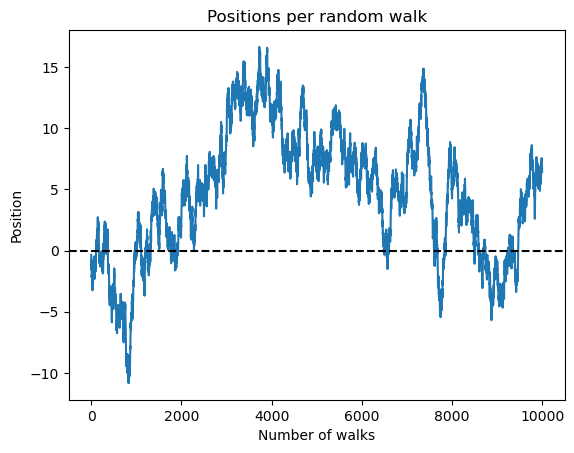

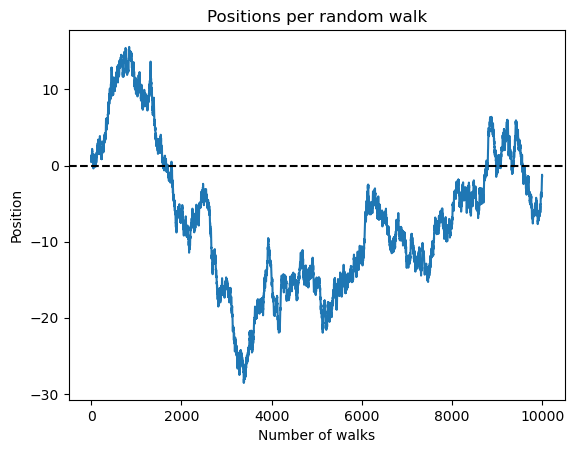

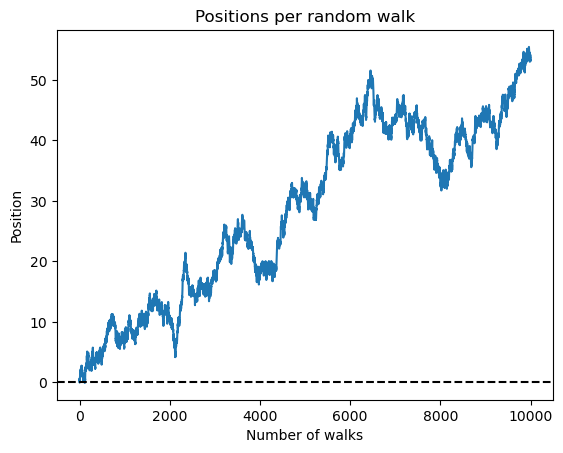

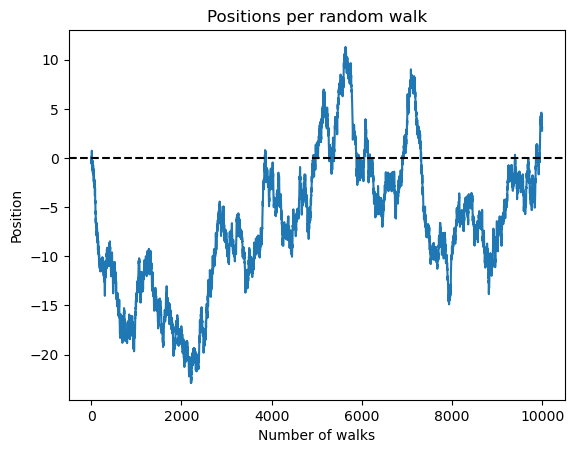

In [3]:
plot_positions(positions=generate_random_walk(number_of_walks=10_000, dimensions=1), show=True)
plot_positions(positions=generate_random_walk(number_of_walks=10_000, dimensions=1), show=True)
plot_positions(positions=generate_random_walk(number_of_walks=10_000, dimensions=1), show=True)
plot_positions(positions=generate_random_walk(number_of_walks=10_000, dimensions=1), show=True)

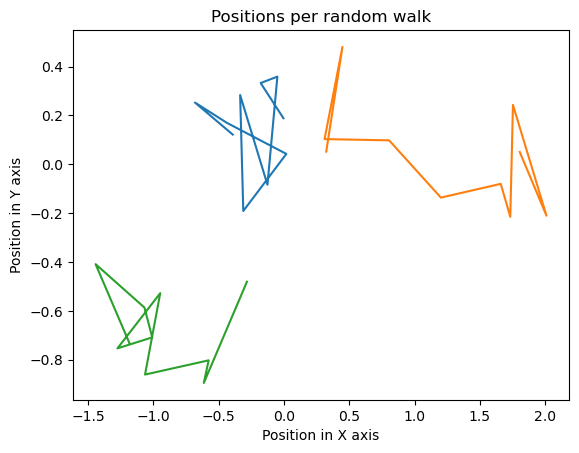

In [4]:
number_of_walks: np.int64 = 10
w1: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)
w2: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)
w3: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)

plot_positions(positions=w1, dimensions=2, show=False)
plot_positions(positions=w2, dimensions=2, show=False)
plot_positions(positions=w3, dimensions=2, show=False)
plt.show()

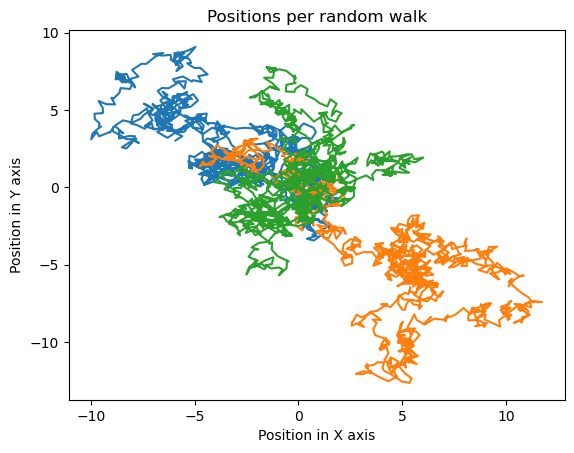

In [5]:
number_of_walks: np.int64 = 1_000
w1: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)
w2: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)
w3: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)

plot_positions(positions=w1, dimensions=2, show=False)
plot_positions(positions=w2, dimensions=2, show=False)
plot_positions(positions=w3, dimensions=2, show=False)
plt.show()

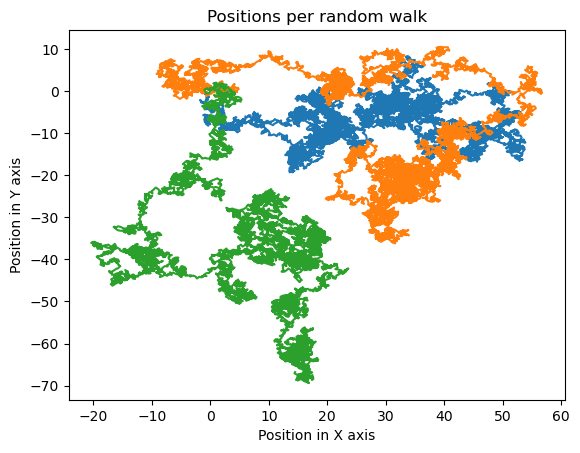

In [6]:
number_of_walks: np.int64 = 100_00
w1: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)
w2: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)
w3: npt.NDArray[np.float64] = generate_random_walk(number_of_walks=number_of_walks, dimensions=2)

plot_positions(positions=w1, dimensions=2, show=False)
plot_positions(positions=w2, dimensions=2, show=False)
plot_positions(positions=w3, dimensions=2, show=False)
plt.show()

In [43]:
def plot_last_positions(
    amount_of_walks: np.int32, number_of_walks: np.int32, show: bool = False
) -> None:
    last_positions: npt.NDArray[np.float64] = np.zeros(
        shape=(amount_of_walks, 2), dtype=np.float64
    )
    for i in np.arange(amount_of_walks):
        last_position: npt.NDArray[np.float64] = generate_random_walk(
            number_of_walks=number_of_walks, dimensions=2
        )[-1]
        last_positions[i] = last_position
    plt.scatter(last_positions[:, 0], last_positions[:, 1], s=0.5, label=f"{number_of_walks}")
    plt.title("Distribuição das posições finais")
    plt.xlabel("Posição no eixo X")
    plt.ylabel("Posição no eixo Y")
    plt.legend(title="Número de passos\n   por caminhada")
    if show:
        plt.show()

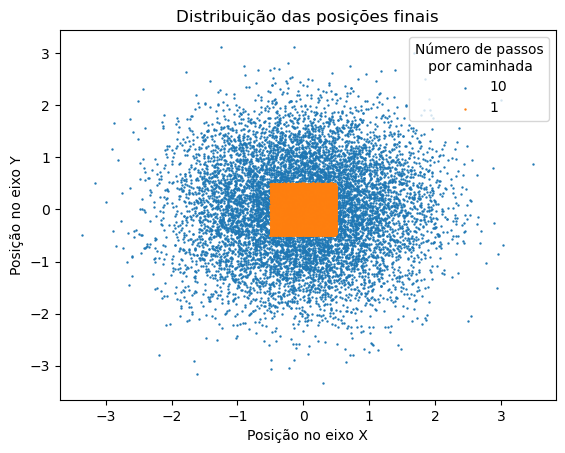

In [44]:
plot_last_positions(amount_of_walks=10_000, number_of_walks=10)
plot_last_positions(amount_of_walks=10_000, number_of_walks=1)
plt.show()

In [62]:
def plot_last_positions_hist(
    amount_of_walks: np.int32,
    number_of_walks: np.int32,
    number_of_bins: np.int32 = 50
) -> None:
    last_positions: npt.NDArray[np.float64] = np.zeros(
        shape=(amount_of_walks, 1), dtype=np.float64
    )
    for i in np.arange(amount_of_walks):
        last_position: npt.NDArray[np.float64] = generate_random_walk(
            number_of_walks=number_of_walks, dimensions=1
        )[-1]
        last_positions[i] = last_position
    plt.hist(last_positions, bins=number_of_bins)
    plt.title(f"Distribuição das posições finais\n{number_of_walks} passos por caminhada")
    plt.xlabel("Posição no eixo X")
    plt.ylabel("Posição no eixo Y")
    plt.show()
    mean_squared_error: np.float64 = np.average(last_positions ** 2)
    sigma : np.float64 = np.sqrt(10_000) * mean_squared_error
    x:npt.NDArray[np.float64] = np.linspace(-3 * sigma, 3 * sigma, 100)
    res = np.exp((-1 * x * x)/(2 * sigma * sigma)) / np.sqrt(2 * np.pi * sigma)
    plt.plot(x, res)
    plt.show()

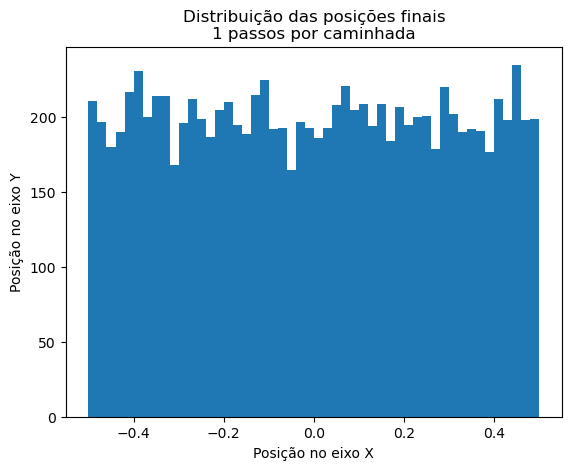

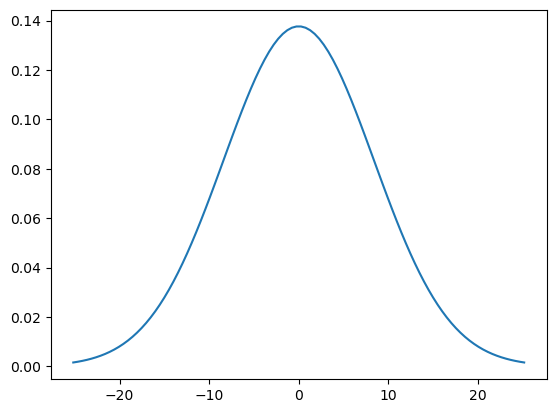

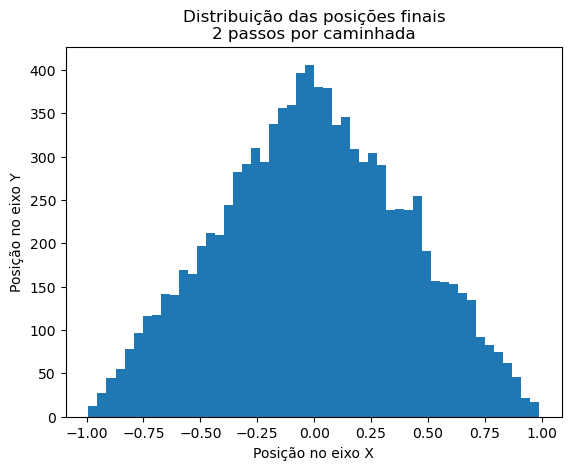

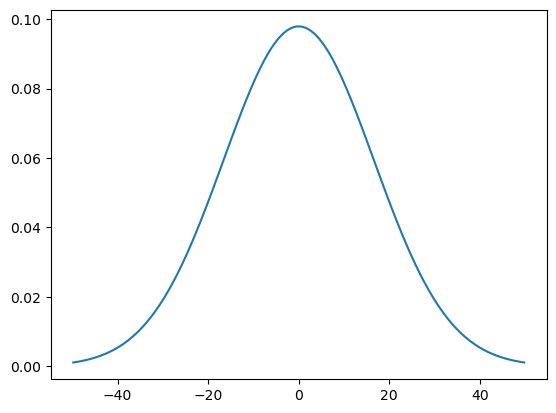

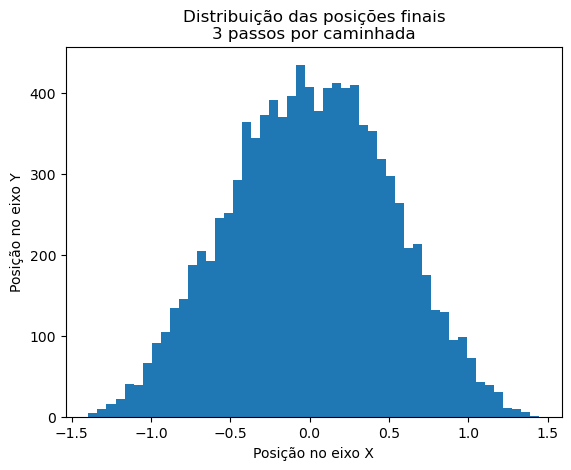

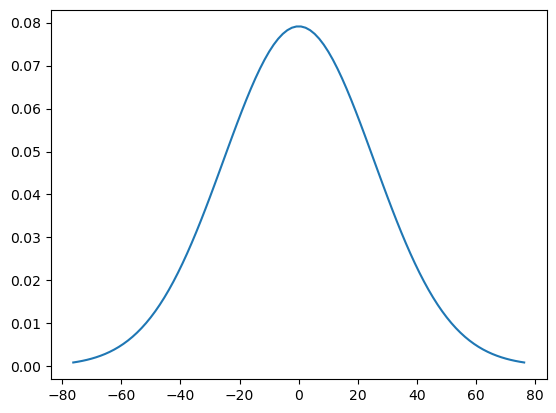

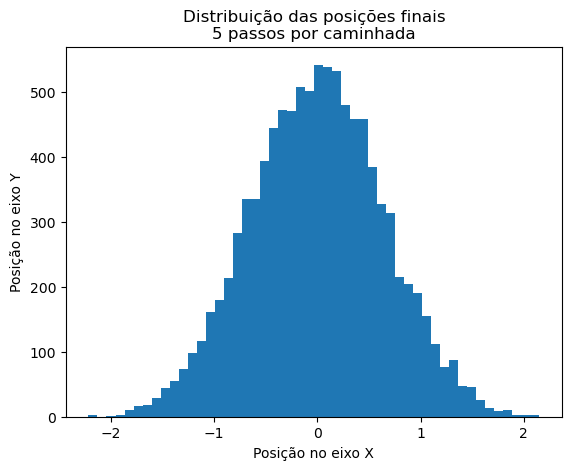

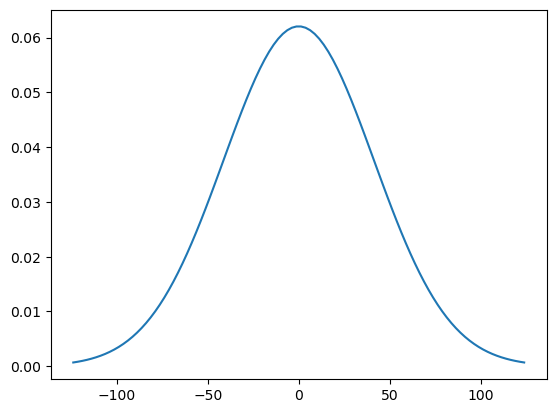

In [64]:
plot_last_positions_hist(amount_of_walks=10_000, number_of_walks=1)
plot_last_positions_hist(amount_of_walks=10_000, number_of_walks=2)
plot_last_positions_hist(amount_of_walks=10_000, number_of_walks=3)
plot_last_positions_hist(amount_of_walks=10_000, number_of_walks=5)

# conclusoes